In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
data=pd.read_csv("datasetSeries.csv")[['Close']]

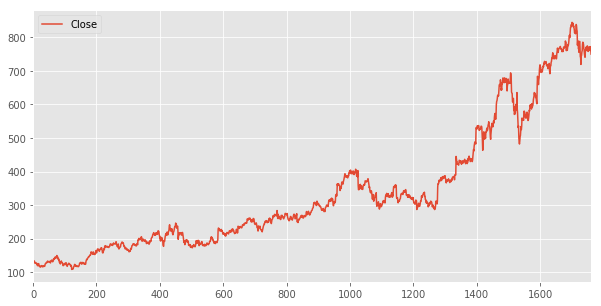

In [3]:
data.plot(figsize=(10,5))
plt.show()

In [4]:
train_data=data.iloc[0:1600,:]
test_data=data.iloc[1600:,:]

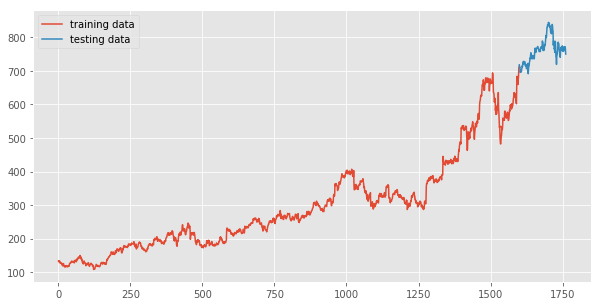

In [5]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(train_data.index,train_data.Close,label='training data')
ax.plot(test_data.index,test_data.Close,label='testing data')
ax.legend()
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
X_train=s.fit_transform(train_data).flatten()
X_test=s.transform(test_data).flatten()

In [7]:
time_stamp=10
batch_size=32

In [8]:
l=[]
for seq in range(X_train.shape[0]-(time_stamp+1)): #10 = time step
    l.append(X_train[seq:(time_stamp+1)+seq])

ALLSeries=np.array(l) # all of size 10 + 1 elements
X_series,y_val=ALLSeries[:,0:-1].reshape(-1,time_stamp,1),ALLSeries[:,-1]

# Model

In [9]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(time_stamp,1)))

model.add(tf.keras.layers.LSTM(units=50,return_sequences=False))

model.add(tf.keras.layers.Dense(units=1))

model.compile(loss='mse',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


# For training

In [11]:
#history=model.fit(x=X_series,y=y_val,batch_size=batch_size,epochs=100)

In [12]:
#fig=plt.figure(figsize=(10,5))
#ax=fig.add_subplot(111)
#ax.plot(history.history['loss'],label='MSE cost function')
#ax.legend()
#plt.show()

# Prediction on training data

In [14]:
pred=model.predict(X_series)

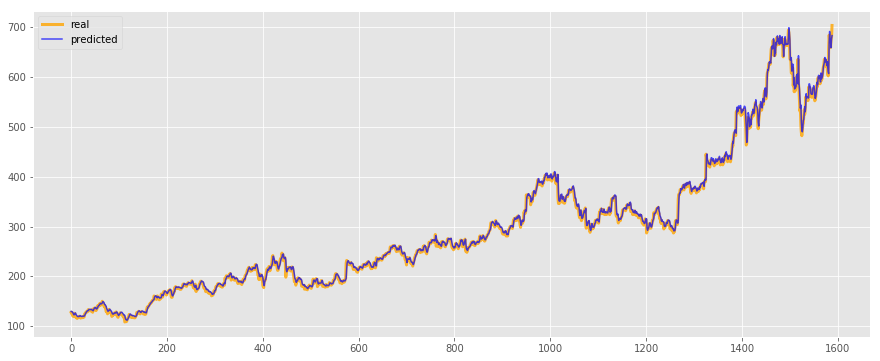

In [15]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
ax.plot(s.inverse_transform(y_val.reshape(-1,1)),label='real',color='orange',alpha=0.8,linewidth=3)
ax.plot(s.inverse_transform(pred),label='predicted',color='b',alpha=0.7)
ax.legend()
plt.show()

# Prediction on Test data

In [16]:
l=[]
for seq in range(X_test.shape[0]-(time_stamp+1)): #10 = time step
    l.append(X_test[seq:(time_stamp+1)+seq])
    
ALLSeries=np.array(l) # all of size 10 + 1 elements
X_test_series,y_test_val=ALLSeries[:,0:-1].reshape(-1,time_stamp,1),ALLSeries[:,-1]

In [17]:
test_pred=model.predict(X_test_series)

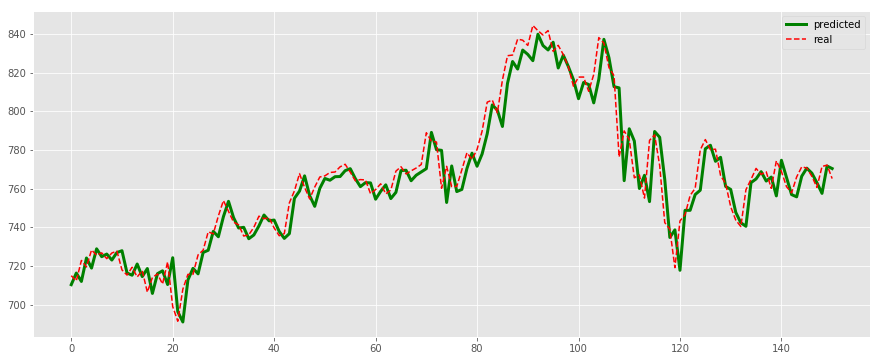

In [18]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(111)
ax.plot(s.inverse_transform(test_pred),label='predicted',linewidth=3,color='g')
ax.plot(s.inverse_transform(y_test_val.reshape(-1,1)),label='real',color='r',linestyle='dashed')
ax.legend()
plt.show()

# LOAD MODEL

In [20]:
#model.save("./keras_Model/my_rnn_model.h5")

In [21]:
#del model

In [13]:
model=tf.keras.models.load_model("./keras_Model/my_rnn_model.h5")

Instructions for updating:
Use tf.cast instead.
